In [15]:
import pandas as pd

papers = pd.read_csv('./data_face/data_group_ner.csv')
# convert type of column
papers.rename(columns={'doc_ner': 'paper_text'}, inplace=True)
papers['paper_text'].astype(str)
# Print head
# print(papers.head())
# print(papers.shape)
print(papers['paper_text'][0])
print(papers['location'][0])
print(papers['person'][0])
print(papers['organization'][0])

nan
[]
[]
[]


In [16]:
papers.head()

,post_id,text,timestamp,time,user_id,location,person,organization,paper_text
0,640719428178910,🔥CÁC KÊNH YOUTUBE HỌC CÁC MÔN🔥\nVào từng ảnh đ...,1.696861e+09,2023-10-09 21:10:58,100042024003239,[],[],[],NaN
1,659246332992886,ae malibu thua nnn chưa ạ,1.699863e+09,2023-11-13 15:06:26,284734091022087,[],[],[],NaN
2,659210466329806,đ*t cụ mấy thằng ptit ở malibu giờ đi ngủ ngậm...,1.699857e+09,2023-11-13 13:26:16,306021115550368,[' ##lib'],[],[],đ*t cụ mấy thằng ptit ở malibu giờ đi ngủ ngậm...
3,659176019666584,"kiếm mập mờ ở malibu gấp, lạnh lắm rồiiiiiii🥶",1.699850e+09,2023-11-13 11:41:09,1482440865923204,['ma ##lib ##u'],[],[],"kiếm mập mờ ở malibu gấp, lạnh lắm rồiiiiiii🥶"
4,659172869666899,Long bào đã kịp về để Tết này còn flex với họ ...,1.699850e+09,2023-11-13 11:31:56,100037648460053,[],[],[],NaN


In [17]:
import numpy as np
# duplicated
print(papers.duplicated().sum())
papers.drop_duplicates(inplace=True)

# drop nan
papers.dropna(axis=0, inplace=True, how="any")
# drop inf
papers.replace([np.inf, -np.inf], np.nan, inplace=True)
papers.replace('', np.nan, inplace=True)
papers.dropna(inplace=True,how='any',axis=0)
# Remove the columns
try:
    papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
except:
    pass

# Print out the first rows of papers
print(papers.head())
print(papers.info())
papers.reset_index(inplace=True, drop=True)

0
            post_id                                               text  \
2   659210466329806  đ*t cụ mấy thằng ptit ở malibu giờ đi ngủ ngậm...   
3   659176019666584      kiếm mập mờ ở malibu gấp, lạnh lắm rồiiiiiii🥶   
6   659173506333502   Khong có em cũng khong sao🔥\n#Malibu ngày đông 🥶   
11  655862303331289  Có ai mê mùi nước giặt ở Thiên Thai như em khu...   
15  659151593002360                                 V ơi tớ lạnh quá 🥶   

       timestamp                 time           user_id          location  \
2   1.699857e+09  2023-11-13 13:26:16   306021115550368        [' ##lib']   
3   1.699850e+09  2023-11-13 11:41:09  1482440865923204  ['ma ##lib ##u']   
6   1.699850e+09  2023-11-13 11:34:04  1009833816917610        ['Malibu']   
11  1.699290e+09  2023-11-06 23:52:19   897989658423274    ['Thiên Thai']   
15  1.699846e+09  2023-11-13 10:27:56  3751041085124649                []   

   person organization                                         paper_text  
2      []     

In [18]:
# get timestamps
timestamps = papers.time.to_list()

In [19]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# replace \n
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: re.sub('\n', ' ', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
print(papers['paper_text_processed'][0])
print(papers['paper_text_processed'][1])
print(papers['paper_text_processed'][2])

đ*t cụ mấy thằng ptit ở malibu giờ đi ngủ ngậm mồm vào tắt âm đê ko ngủ để ngkhac ngủ lớn rồi ý thức lên
kiếm mập mờ ở malibu gấp lạnh lắm rồiiiiiii🥶
khong có em cũng khong sao🔥 #malibu ngày đông 🥶


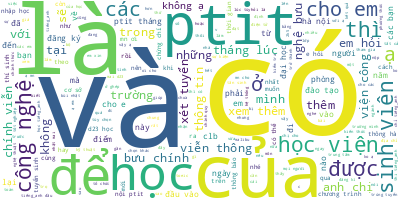

In [20]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [21]:


import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode
import string
import re
import pyvi
import json
import underthesea
from pyvi import ViTokenizer, ViPosTagger
from underthesea import word_tokenize
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
stop_words = set(open("./data_test/vietnamese-stopwords-dash.txt", "r", encoding="utf-8").read().splitlines())

def remove_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

def remove_number(text):
    return re.sub(r'\d+', '', text).strip()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_punctuation_not_underscore(text): # remove dấu câu để lại dấu _
    # Tạo một bản sao của string.punctuation và loại bỏ dấu _
    punctuation = string.punctuation.replace("_", "")
    # punctuation = punctuation.replace("-", "")
    return text.translate(str.maketrans('', '', punctuation))

def remove_(text):
    text = remove_punctuation_not_underscore(text)
    text = remove_number(text)
    text = re.sub(r'[\x00-\x1F\x7F-\x9F]', '', text)
    text = text.replace("_  _", "_")
    return re.sub(r'“|”', '', text).strip()
    # return ''.join(char for char in text if char not in ['“', '”'])

def remove_punctuation_underscore(text): # remove dấu _
    punctuation = "_"
    return text.translate(str.maketrans('', '', punctuation))
    
def word_to_phrase(text): # chuyển từ thành cụm từ
    # return ViTokenizer.tokenize(text)
    return word_tokenize(text, format="text")

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        # loại bỏ dấu câu and split
        yield([str(word) for word in sentence.split()])

def remove_stopwords(texts):
    words = [word for word in texts.split() if word not in stop_words]
    words_to_sentence = ' '.join(words)
    return words_to_sentence.strip()

def remove_emoj(text):
    emoj = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002500-\U00002BEF"  # chinese char
                        u"\U00002702-\U000027B0"
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U00010000-\U0010ffff"
                        u"\u2640-\u2642" 
                        u"\u2600-\u2B55"
                        u"\u200d"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"  # dingbats
                        u"\u3030"
                                    "]+", re.UNICODE)
    return re.sub(emoj, '', text)

# drop word while # in word
def remove_word_hash(text):
    # text = re.sub(r'#.*', '', text).strip() # remove word all while # before
    return re.sub(r'#\w+', '', text).strip()
# drop url
def remove_url(text):
    text = re.sub(r'http\S+', '', text).strip()
    text = re.sub(r'www\S+', '', text).strip()
    text = re.sub(r'pic\S+', '', text).strip()
    text = re.sub(r'bit.ly\S+', '', text).strip()
    text = re.sub(r'fb\S+', '', text).strip()
    text = re.sub(r'com\S+', '', text).strip()
    text = re.sub(r'https\S+', '', text).strip()
    return text

# drop email
def remove_email(text):
    # \S kí tự không phải khoảng trắng
    # \S* kí tự không phải khoảng trắng xuất hiện 0 hoặc nhiều lần
    # \s? có thể có hoặc không có khoảng trắng cuối chuỗi
    return re.sub(r'\S*@\S*\s?', '', text).strip()

# scale word summary
def scale_word_summary(text):
    with open('./data_test/word_summary.json', 'r', encoding='utf-8') as f:
        word_summary = json.load(f)
    text = text.split()
    for i, word in enumerate(text):
        for key, value in word_summary.items():
            key = key.split('|')
            if word in key:
                text[i] = re.sub(r'\s+','_',value)
    return ' '.join(text)

# drop syntax
def pos_tagging_drop(text):
    list_dict = underthesea.pos_tag(text)
    list_word = []
    for i,val in list_dict:
        if val not in ['CH', 'L', 'M', 'R', 'E', 'C', 'I', 'T', 'X', 'Y']:
            list_word.append(i) # P, N, V, A, 'Np', 'Nc', 'Nu'
    return ' '.join(list_word)

# drop_special_character_in_word
def remove_special_character_in_word(text):
    text = re.sub(r'\w*[\+\-\/\*\%\=\(\)\[\]\{\}]\w*\s?', '', text).strip()
    return text

data = papers['paper_text_processed']
data = data.apply(lambda x: remove_whitespace(x)) # remove whitespace (tab, \n, \r)
data = data.apply(lambda x: scale_word_summary(x)) # scale word summary (mjk -> mình)
data = data.apply(lambda x: remove_word_hash(x)) # remove word hash (#) hashtag
data = data.apply(lambda x: remove_special_character_in_word(x)) # remove special character in word ("***dung" -> "")
data = data.apply(lambda x: pos_tagging_drop(x)) # pos tagging drop (Ngày mai, tôi sẽ đi học -> Ngày mai, tôi đi học)
data = data.apply(lambda x: remove_emoj(x)) # remove emoj (😂)
## data = data.apply(lambda x: remove_punctuation(x)) # remove punctuation (.,!?) 
data = data.apply(lambda x: remove_email(x)) # remove email (gmail.com)
data = data.apply(lambda x: remove_url(x)) # remove url (https://www.facebook.com)
data = data.apply(lambda x: remove_number(x)) # remove number (123)
## data = data.apply(lambda x: remove_punctuation_underscore(x))
data = data.apply(lambda x: word_to_phrase(x)) # word to phrase (tôi là ai -> tôi_là_ai)
data = data.apply(lambda x: remove_(x))
data = data.apply(lambda x: remove_stopwords(x))

print(data[0])
print(data[1])
print(data[2])

# print(remove_stopwords(text))
docs = data.tolist()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/minhthuy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/minhthuy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


cụ thằng malibu đi ngủ ngậm mồm tắt_âm đê ngủ ngủ ý_thức
kiếm mập_mờ malibu gấp lạnh rồiiiiiii
đông


In [22]:
data_words = list(sent_to_words(docs))


In [23]:
print(len(data_words))

968


In [25]:
print(data_words[:1][0][:30])

['cụ', 'thằng', 'malibu', 'đi', 'ngủ', 'ngậm', 'mồm', 'tắt_âm', 'đê', 'ngủ', 'ngủ', 'ý_thức']


In [24]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


In [26]:
from pprint import pprint

# number of topics
num_topics = 4

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.090*"_" + 0.019*"tiếng_anh" + 0.014*"học" + 0.014*"trường" + '
  '0.013*"sinh_viên" + 0.011*"học_viện" + 0.010*"anh_chị" + 0.009*"thi" + '
  '0.009*"bưu_chính" + 0.008*"hà_nội"'),
 (1,
  '0.012*"học" + 0.009*"ngành" + 0.008*"học_viện" + 0.007*"sinh_viên" + '
  '0.007*"viễn_thông" + 0.007*"thi" + 0.006*"trường" + 0.006*"công_nghệ" + '
  '0.005*"ghép" + 0.005*"anh_chị"'),
 (2,
  '0.057*"_" + 0.013*"câu_lạc_bộ" + 0.009*"trường" + 0.008*"đăng_ký" + '
  '0.007*"học_viện" + 0.006*"phòng" + 0.006*"xét" + 0.006*"thí_sinh" + '
  '0.006*"bưu_chính" + 0.006*"thi"'),
 (3,
  '0.025*"học" + 0.020*"ngành" + 0.011*"công_nghệ_thông_tin" + '
  '0.010*"tiếng_anh" + 0.009*"thi" + 0.009*"viễn_thông" + 0.008*"trường" + '
  '0.008*"sinh_viên" + 0.008*"công_nghệ" + 0.007*"anh_chị"')]


In [28]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./docs/results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './docs/results/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.057173  0.041514       1        1  38.498039
3      0.056801  0.048086       2        1  23.459378
2     -0.056429 -0.041787       3        1  20.494017
1      0.056801 -0.047813       4        1  17.548565, topic_info=                     Term        Freq       Total Category  logprob  loglift
61                      _  678.000000  678.000000  Default  30.0000  30.0000
52                  ngành  119.000000  119.000000  Default  29.0000  29.0000
35                    học  194.000000  194.000000  Default  28.0000  28.0000
49    công_nghệ_thông_tin   54.000000   54.000000  Default  27.0000  27.0000
36              tiếng_anh  147.000000  147.000000  Default  26.0000  26.0000
...                   ...         ...         ...      ...      ...      ...
8                      đi    9.022383   80.805335   Topic4  -5.6124  -0.4521
957            tuyển_sinh    8.093920   44.406970   Topic4  -5.7210   0.0379
324               đại_học    8.047179   50.712615   Topic4  -5.7268  -0.1007
148            câu_lạc_bộ    8.262329   88.308327   Topic4  -5.7004  -0.6289
1144                  xét    7.457127   51.803405   Topic4  -5.8029  -0.1981

[327 rows x 6 columns], token_table=      Topic      Freq                           Term
term                                                
61        1  0.719748                              _
61        2  0.032448                              _
61        3  0.244832                              _
61        4  0.002950                              _
2817      2  0.741733  _____________________________
...     ...       ...                            ...
2205      4  0.116470                              ‼
732       1  0.084001                              ⃣
732       2  0.084001                              ⃣
732       3  0.336005                              ⃣
732       4  0.504008                              ⃣

[547 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])